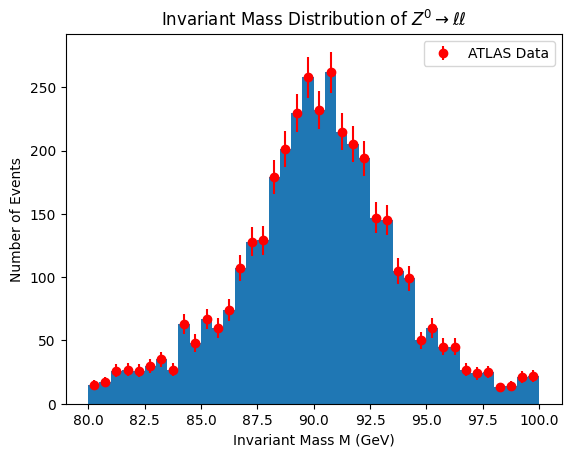

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Part 1A
df = pd.read_csv('atlas_z_to_ll.csv')
df.columns = ['pT1', 'pT2', 'eta1', 'eta2', 'phi1', 'phi2', 'E1', 'E2']

#Part 1B
# vector components
px1 = df['pT1'] * np.cos(df['phi1'])
py1 = df['pT1'] * np.sin(df['phi1'])
pz1 = df['pT1'] * np.sinh(df['eta1'])

px2 = df['pT2'] * np.cos(df['phi2'])
py2 = df['pT2'] * np.sin(df['phi2'])
pz2 = df['pT2'] * np.sinh(df['eta2'])

E = df['E1'] + df['E2']
pt = [px1 + px2, py1 + py2, pz1 + pz2]

M = np.sqrt(E**2 -(pt[0]**2 + pt[1]**2 + pt[2]**2))

#Part 1C
fig,ax = plt.subplots()
bins = np.linspace(80, 100, 41)
counts, bins, p = ax.hist(M, bins)
errors = np.sqrt(counts)
center = 0.5 * (bins[1:] + bins[:-1])

ax.errorbar(center,counts,yerr=errors,fmt='o',label='ATLAS Data', color = 'red')
ax.set_xlabel('Invariant Mass M (GeV)')
ax.set_ylabel('Number of Events')
ax.set_title(r'Invariant Mass Distribution of $Z^0 \rightarrow \ell\ell$')
ax.legend();


chisq: 9.9851
reduced chisq: 0.9985
p: 0.4418


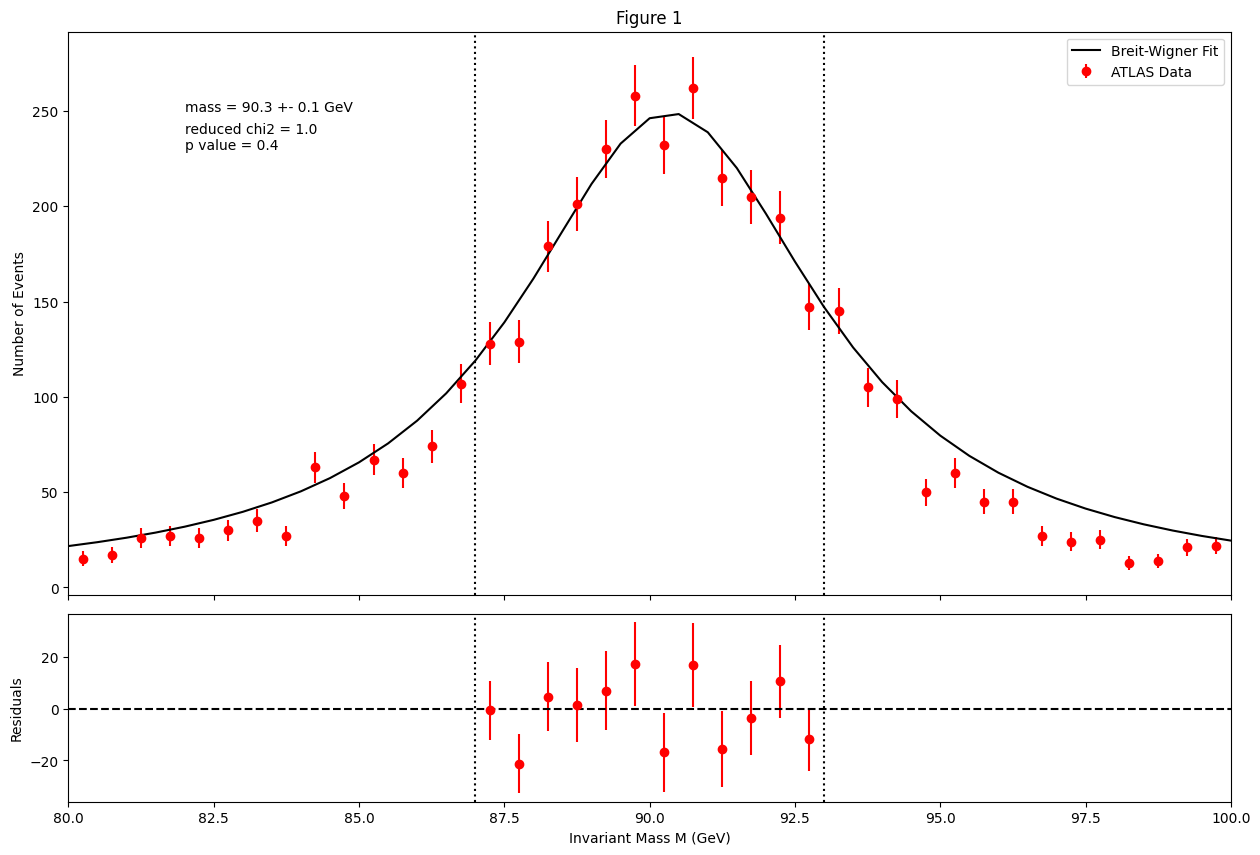

In [69]:
import math
#Part 2A
def decay(m,m0,gamma):
    return (5000/2)*(1/math.pi)*(gamma/2)/((m-m0)**2+(gamma/2)**2)

#Part 2B
from scipy.optimize import curve_fit
mask = (center > 87) & (center < 93)
params,covar = curve_fit(decay,center[mask],counts[mask],sigma=errors[mask],absolute_sigma=True)
m0f,gf = params
m0err,gerr = covar

fig,(ax,ax_bot) = plt.subplots(2,1,sharex=True,figsize=(15,10),gridspec_kw={"height_ratios":[3,1],'hspace':0.05})
ax.errorbar(center,counts,yerr=errors,fmt='o',label='ATLAS Data',color='red')
ax.plot(bins,decay(bins,m0f,gf),label='Breit-Wigner Fit',color = 'black')
ax.axvline(87,color='black',linestyle=':')
ax.axvline(93,color='black',linestyle=':')
ax.set_ylabel('Number of Events')
ax.text(82,250, f"mass = {m0f:.1f} +- {np.sqrt(np.diag(covar))[0]:.1f} GeV")
ax.legend()

residuals = counts[mask] - decay(center[mask],m0f,gf)
ax_bot.errorbar(center[mask],residuals,yerr=errors[mask],fmt = 'o',color = 'red')
ax_bot.set_xlim(80,100)
ax_bot.axhline(0, color='black', ls='--')
ax_bot.axvline(87,color='black',linestyle=':')
ax_bot.axvline(93,color='black',linestyle=':')
ax_bot.set_xlabel('Invariant Mass M (GeV)')
ax_bot.set_ylabel('Residuals')
ax.set_title('Figure 1')

#Part 2C
from scipy.stats import chi2
chisq = np.sum((residuals/errors[mask])**2)
ndof = len(center[mask]) - len(params)
rchisq = chisq/ndof
p = 1 - chi2.cdf(chisq,ndof)
print(f'chisq: {chisq:.4f}\nreduced chisq: {rchisq:.4f}\np: {p:.4f}')
ax.text(82,230, f"reduced chi2 = {rchisq:.1f}\np value = {p:.1f}");

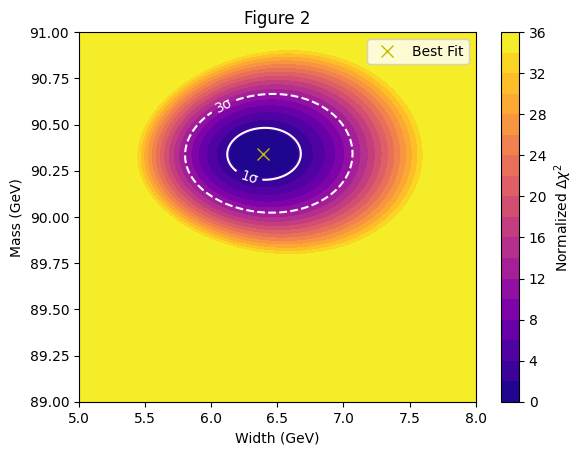

In [72]:
# Part 3A
mass = np.linspace(89,91,300)
width = np.linspace(5,8,300)

chi2s = np.zeros((300,300))

for i, m0 in enumerate(mass):
    for j, gamma in enumerate(width):
        v = decay(center[mask],m0,gamma)
        chi2 = np.sum((counts[mask]-v)**2/errors[mask]**2)
        chi2s[i,j] = chi2

# Part 3B
chi2min = np.ones((300,300))*np.min(chi2s)
dchi2 = chi2s-chi2min
dchi2 = np.clip(dchi2,0,35)

M,W = np.meshgrid(width,mass)

fig,ax = plt.subplots()
contour = ax.contourf(M,W,dchi2,levels=20,cmap='plasma')
ax.set_ylabel("Mass (GeV)")
ax.set_xlabel("Width (GeV)")
colorbar = fig.colorbar(contour)
colorbar.set_label(r'Normalized $\Delta \chi^2$')

# Part 3C
confidence = ax.contour(M,W, dchi2, levels=[2.30, 11.83], linestyles=['solid', 'dashed'], colors = 'white')
ax.clabel(confidence, fmt={2.3: '1σ', 11.83: '3σ'});

#Part 3D
ax.plot(gf,m0f,'yx',markersize = 8,label = 'Best Fit')
ax.legend()
ax.set_title("Figure 2");